### Generalized Least Squares Lab

In this lab, you will fit a GLS model to a data set from the chemical and taste analysis of cheddar cheese. To begin, import the data set below.

In [1]:
load('cheddar.rda')
cheddar <- cheddar

We will then add a new column, `time`, to the data. 

In [2]:
cheddar$time <- 1: nrow(cheddar)

Now, fit a linear model predicting taste using data for `Acetic`, `H2S`, and `Lactic`. Save your model to `lmod`.

In [3]:
# Fit a linear model predicting taste using Acetic, H2S, and Lactic
lmod <- lm(taste ~ Acetic + H2S + Lactic, data = cheddar)

# Print the summary of the linear model
summary(lmod)


Call:
lm(formula = taste ~ Acetic + H2S + Lactic, data = cheddar)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.390  -6.612  -1.009   4.908  25.449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -28.8768    19.7354  -1.463  0.15540   
Acetic        0.3277     4.4598   0.073  0.94198   
H2S           3.9118     1.2484   3.133  0.00425 **
Lactic       19.6705     8.6291   2.280  0.03108 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.13 on 26 degrees of freedom
Multiple R-squared:  0.6518,	Adjusted R-squared:  0.6116 
F-statistic: 16.22 on 3 and 26 DF,  p-value: 3.81e-06


Now, plot the residuals from the model against time using `plot()`. What do you see? 

NULL

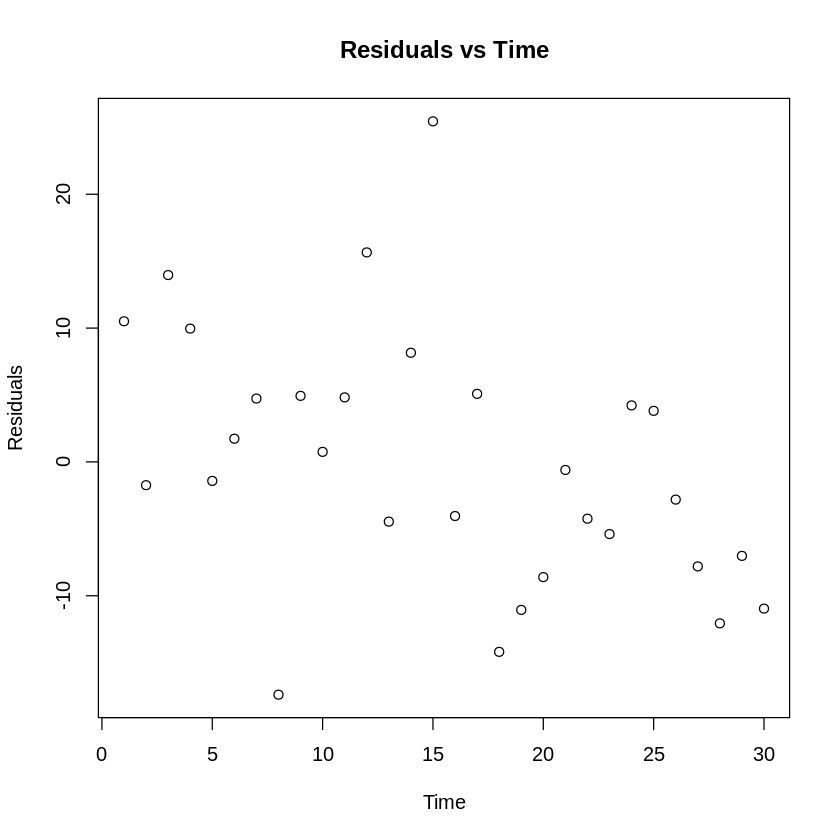

In [4]:
# Plot the residuals from the model against time
model_plot <- plot(cheddar$time, resid(lmod), xlab = "Time", ylab = "Residuals", main = "Residuals vs Time")

model_plot

Finally, fit a GLS model using AR(1) correlation. Is there evidence of correlation between the errors? Calculate the confidence interval on that using the `intervals` function.

In [5]:
# Load the necessary library
library(nlme)

# Fit a GLS model with AR(1) correlation
glmod <- gls(taste ~ Acetic + H2S + Lactic, 
             data = cheddar, 
             correlation = corAR1(form = ~ time))

# Print the summary of the GLS model
summary(glmod)

# Calculate the confidence intervals for the GLS model parameters
glmod_intervals <- intervals(glmod)

# Print the confidence intervals
print(glmod_intervals)


Generalized least squares fit by REML
  Model: taste ~ Acetic + H2S + Lactic 
  Data: cheddar 
     AIC      BIC  logLik
  214.94 222.4886 -101.47

Correlation Structure: AR(1)
 Formula: ~time 
 Parameter estimate(s):
      Phi 
0.2641944 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept) -30.332472 20.273077 -1.496195  0.1466
Acetic        1.436411  4.876581  0.294553  0.7707
H2S           4.058880  1.314283  3.088284  0.0047
Lactic       15.826468  9.235404  1.713674  0.0985

 Correlation: 
       (Intr) Acetic H2S   
Acetic -0.899              
H2S     0.424 -0.395       
Lactic  0.063 -0.416 -0.435

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.64546468 -0.63861716 -0.06641714  0.52255676  2.41323020 

Residual standard error: 10.33276 
Degrees of freedom: 30 total; 26 residual

Approximate 95% confidence intervals

 Coefficients:
                 lower       est.     upper
(Intercept) -72.004379 -30.332472 11.339436
Acetic       -8.587544   1.436411 11.460367
H2S           1.357332   4.058880  6.760427
Lactic       -3.157177  15.826468 34.810113
attr(,"label")
[1] "Coefficients:"

 Correlation structure:
         lower      est.     upper
Phi -0.1691911 0.2641944 0.6119659
attr(,"label")
[1] "Correlation structure:"

 Residual standard error:
    lower      est.     upper 
 7.626315 10.332756 13.999664 


In [6]:
# your code here
